In [ ]:
# Install required libraries (run once)
!pip install soundfile simpleaudio librosa scipy


  Using cached simpleaudio-1.0.4.tar.gz (2.0 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for simpleaudio
  Running setup.py clean for simpleaudio
Failed to build simpleaudio
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (simpleaudio)


In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
from scipy.signal import resample


In [ ]:
# Load speech file
audio_path = "/content/LJ037-0171.wav"   # replace with your file path
signal, sample_rate = sf.read(audio_path)

print("Sample Rate:", sample_rate)
print("Number of Samples:", len(signal))


Sample Rate: 22050
Number of Samples: 167226


In [ ]:
total_duration = len(signal) / sample_rate
print("Total Duration (sec):", total_duration)


Total Duration (sec): 7.583945578231292


In [ ]:
# Energy calculation
energy = signal**2
threshold = 0.01 * np.max(energy)

active_indices = np.where(energy > threshold)[0]
active_duration = len(active_indices) / sample_rate

print("Active Speech Duration (sec):", active_duration)


Active Speech Duration (sec): 1.3397278911564625


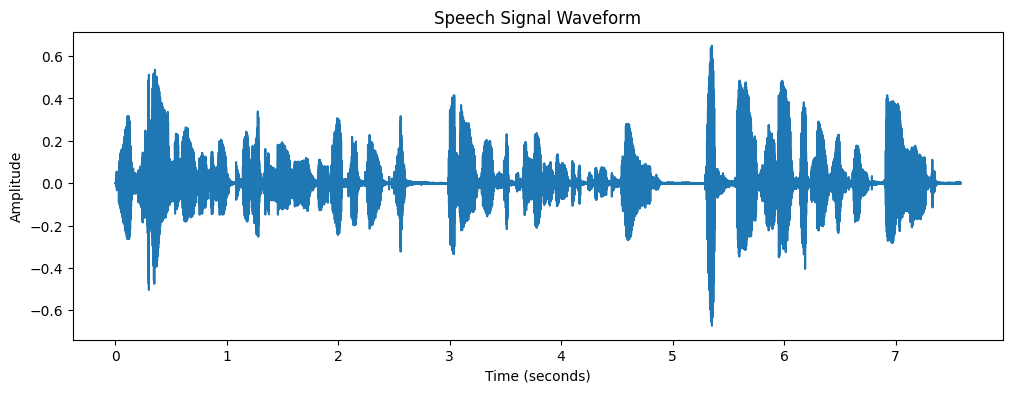

In [ ]:
time = np.linspace(0, total_duration, len(signal))

plt.figure(figsize=(12,4))
plt.plot(time, signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Speech Signal Waveform")
plt.show()


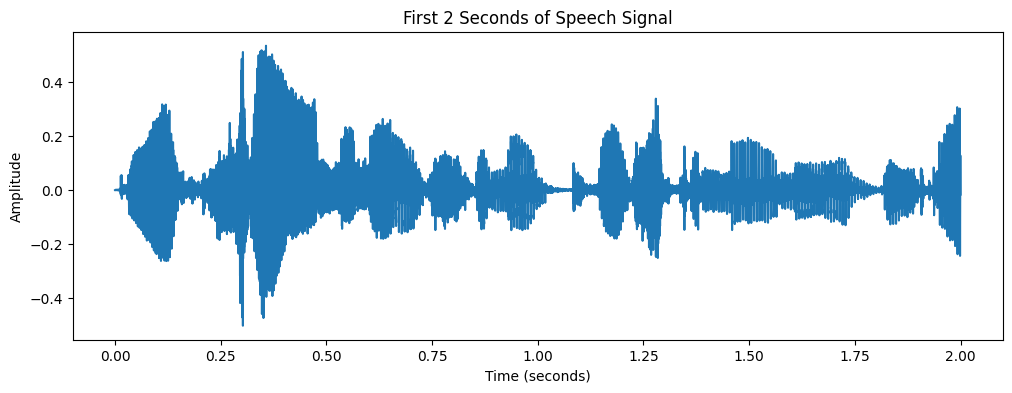

In [ ]:
slice_duration = 2  # seconds
slice_samples = int(sample_rate * slice_duration)
sliced_signal = signal[:slice_samples]

time_slice = np.linspace(0, slice_duration, len(sliced_signal))

plt.figure(figsize=(12,4))
plt.plot(time_slice, sliced_signal)
plt.title("First 2 Seconds of Speech Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


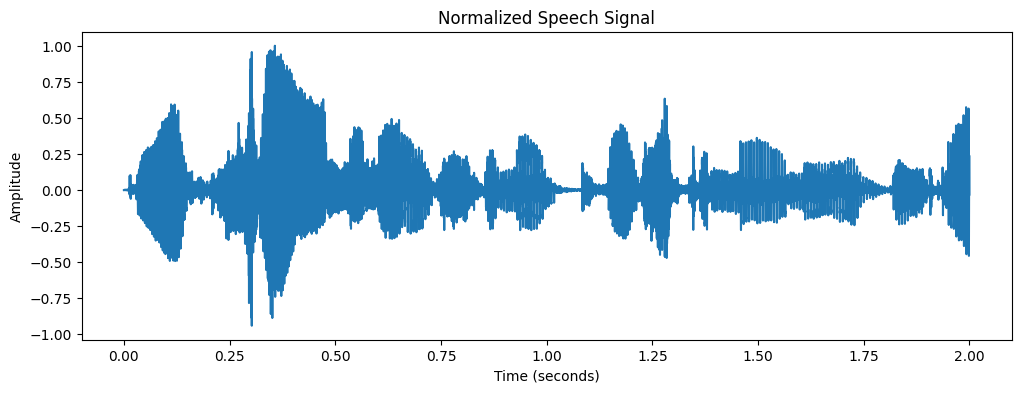

In [ ]:
normalized_signal = sliced_signal / np.max(np.abs(sliced_signal))

plt.figure(figsize=(12,4))
plt.plot(time_slice, normalized_signal)
plt.title("Normalized Speech Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


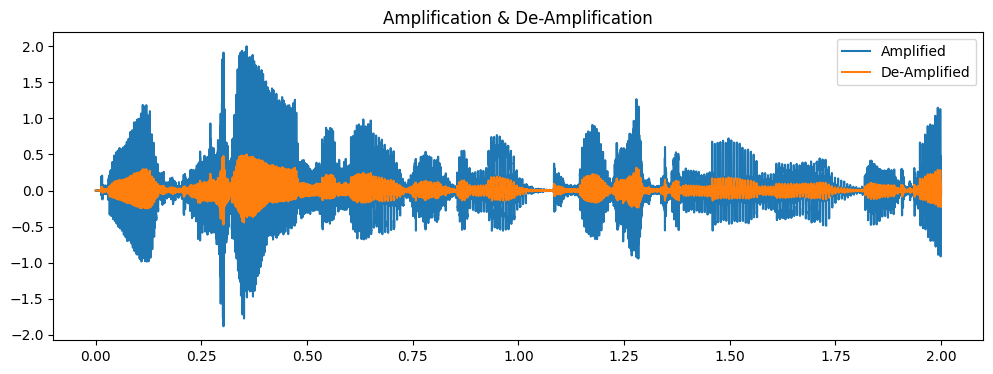

In [ ]:
amplified_signal = normalized_signal * 2
deamplified_signal = normalized_signal * 0.5

plt.figure(figsize=(12,4))
plt.plot(time_slice, amplified_signal, label="Amplified")
plt.plot(time_slice, deamplified_signal, label="De-Amplified")
plt.legend()
plt.title("Amplification & De-Amplification")
plt.show()


In [ ]:
# Up-sampling (2x)
upsampled_signal = resample(normalized_signal, len(normalized_signal)*2)

# Down-sampling (0.5x)
downsampled_signal = resample(normalized_signal, len(normalized_signal)//2)


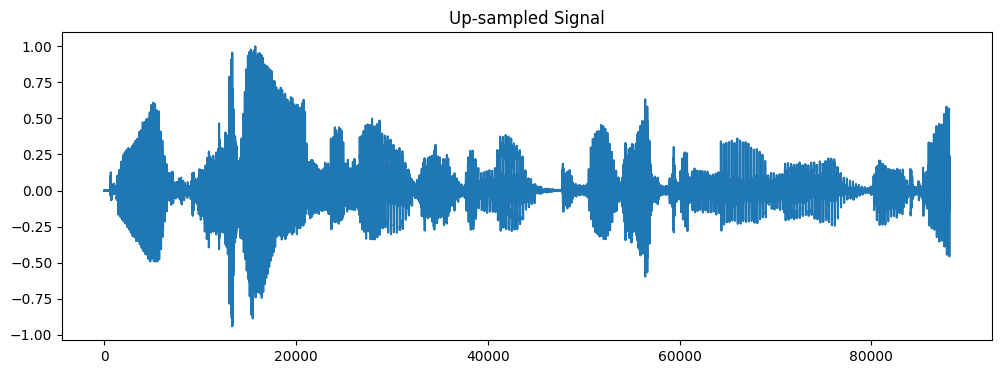

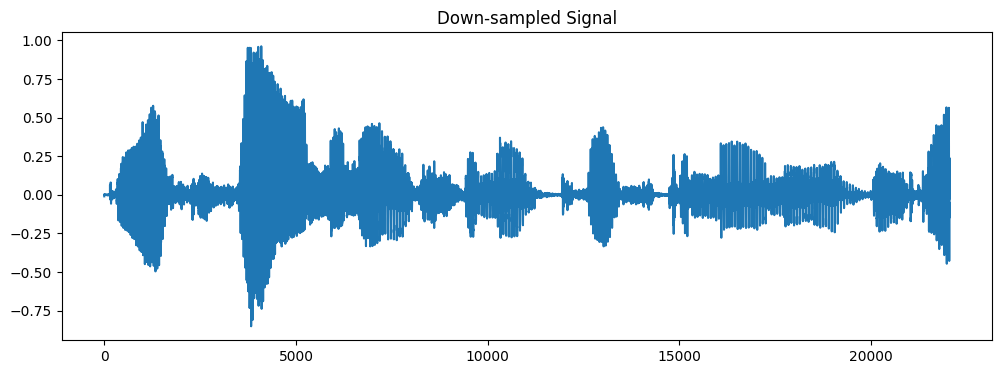

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(upsampled_signal)
plt.title("Up-sampled Signal")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(downsampled_signal)
plt.title("Down-sampled Signal")
plt.show()


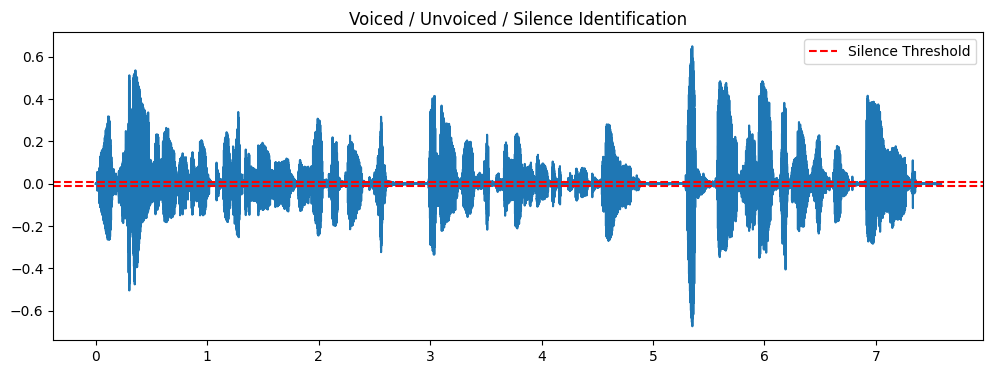

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(time, signal)
plt.axhline(0.01, color='r', linestyle='--', label='Silence Threshold')
plt.axhline(-0.01, color='r', linestyle='--')
plt.legend()
plt.title("Voiced / Unvoiced / Silence Identification")
plt.show()


In [4]:
#q1
from scipy.io import wavfile

samplerate, data = wavfile.read("/speedch.wav")

print("Sampling Rate (Hz):", samplerate)
print("Data Type:", data.dtype)

# Bit depth calculation
bit_depth = data.dtype.itemsize * 8
print("Bit Depth:", bit_depth, "bits")


Sampling Rate (Hz): 48000
Data Type: int16
Bit Depth: 16 bits
